### Import libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt


### Apertura dataset:

In [2]:
prom_final_y_one_hot = pd.read_parquet('./prom_final_y_one_hot.parquet')

In [3]:
prom_final_y_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49128 entries, 0 to 49127
Columns: 262 entries, business_id to stars_volume
dtypes: float64(255), string(7)
memory usage: 98.2 MB


In [4]:
prom_final_y_one_hot.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal,stars_volume
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,1280.00,1.116332e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010407
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,263.25,3.210410e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001768
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,24.00,2.051520e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000231
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.768170,22.50,5.456169e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000330
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,TN,46227,39.637133,-86.127217,175.00,8.446150e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002148


### Aplicacion Cosine Similarity:

In [5]:
# Seleccionar un restaurante aleatorio del conjunto de datos
restaurante_aleatorio = prom_final_y_one_hot.sample(random_state=41)

# Seleccionar solo las columnas numéricas relevantes para el cálculo de similitud
columnas_numericas_relevantes = restaurante_aleatorio.select_dtypes(include='number').values

# Calcular la similitud del coseno con respecto a todos los restaurantes
similitud_coseno = cosine_similarity(columnas_numericas_relevantes, prom_final_y_one_hot.select_dtypes(include='number'))

# Obtener los índices de los 10 restaurantes más similares, incluyendo el índice 0
indices_similares = np.argsort(similitud_coseno[0])[::-1][:10]



In [6]:
# Calcular el porcentaje de similitud para los 10 restaurantes más similares
for i, indice in enumerate(indices_similares):
    similitud = similitud_coseno[0][indice]  # Obtener la similitud del coseno para el restaurante en el índice
    porcentaje_similitud = (similitud * 100).round(2)  # Convertir a porcentaje y redondear a 2 decimales
    print(f"Porcentaje de similitud con restaurante {indice}: {porcentaje_similitud}%")


Porcentaje de similitud con restaurante 6176: 100.0%
Porcentaje de similitud con restaurante 46660: 100.0%
Porcentaje de similitud con restaurante 9030: 100.0%
Porcentaje de similitud con restaurante 47183: 100.0%
Porcentaje de similitud con restaurante 38637: 100.0%
Porcentaje de similitud con restaurante 45630: 100.0%
Porcentaje de similitud con restaurante 39318: 100.0%
Porcentaje de similitud con restaurante 11894: 100.0%
Porcentaje de similitud con restaurante 27089: 100.0%
Porcentaje de similitud con restaurante 27565: 100.0%


### Crear un DataFrame con los 10 restaurantes más similares
*Analiza competencia de los 10 mas similares....*

In [7]:
# Obtener los índices de los restaurantes más similares (top 10)
indices_10_similares = np.argsort(similitud_coseno[0])[::-1][1:11]  # Tomamos los primeros 10

# Crear un DataFrame con los 10 restaurantes más similares
restaurantes_similares = prom_final_y_one_hot.iloc[indices_10_similares]

# Mostrar el DataFrame con los 10 restaurantes más similares
print("Restaurantes Más Similares (Top 10):")
print(restaurantes_similares)


Restaurantes Más Similares (Top 10):
                  business_id                                  name  \
46660  zOtbdSGCVYRLiaSCokZDbA                             Umai Cafe   
9030   2nnp7C4d9QrJ616R39wKUA    The Pint and Brew - Downtown Tampa   
47183  RjTT7tn9BPTfRmyJagMN6g                Lolis Mexican Cravings   
38637  W-fBHvwfkPuyojEbOQTHOQ                         Cycle Brewing   
45630  sCkBUXw-GrMvRRxcun-Alg                           Fusion Bowl   
39318  S_EYSW6QoJh8cKlj8BhfFA            Anthony's Coal Fired Pizza   
11894  GSiZfdrbw72LF1D2xTaTzQ                           Mission BBQ   
27089  frKu7zT5UdfcafYfmRLhmA                     River's View Thai   
27565  tMUA2eajVUqrU8tdA-DvnA                           Pho Loc Tho   
29362  6o8ddZAL2Gw_FdoFQf1ilg  Green Island Frozen Yogurt & Tea Bar   

                           address              city state postal_code  \
46660  601 South Fort Harrison Ave        Clearwater    TN       33756   
9030                200 N Tampa S

In [8]:
restaurantes_similares.head(11)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal,stars_volume
46660,zOtbdSGCVYRLiaSCokZDbA,Umai Cafe,601 South Fort Harrison Ave,Clearwater,TN,33756,27.959426,-82.799727,3888.00,0.000724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028381
9030,2nnp7C4d9QrJ616R39wKUA,The Pint and Brew - Downtown Tampa,200 N Tampa St,Tampa,PA,33602,27.946251,-82.458467,3867.75,0.000716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028232
47183,RjTT7tn9BPTfRmyJagMN6g,Lolis Mexican Cravings,10011 W Hillsborough Ave,Tampa,TN,33615,28.003624,-82.596112,3872.00,0.001022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031817
38637,W-fBHvwfkPuyojEbOQTHOQ,Cycle Brewing,534 Central Ave,Saint Petersburg,NV,33701,27.771062,-82.640914,3872.00,0.001022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031817
45630,sCkBUXw-GrMvRRxcun-Alg,Fusion Bowl,504 E Kennedy Blvd,Tampa,TN,33602,27.948600,-82.455777,3867.75,0.000716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028232
39318,S_EYSW6QoJh8cKlj8BhfFA,Anthony's Coal Fired Pizza,1912 W Brandon Blvd,Brandon,PA,33511,27.938180,-82.315796,3856.00,0.001014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031685
11894,GSiZfdrbw72LF1D2xTaTzQ,Mission BBQ,13612 Bruce B Downs Blvd,Tampa,FL,33613,28.071319,-82.426763,3888.00,0.000724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028381
27089,frKu7zT5UdfcafYfmRLhmA,River's View Thai,11218 Casa Loma Dr,Riverview,LA,33569,27.865570,-82.316320,3847.50,0.000709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028083
27565,tMUA2eajVUqrU8tdA-DvnA,Pho Loc Tho,11262 Boyette Rd,Riverview,CA,33569,27.854625,-82.315703,3847.50,0.000709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028083
29362,6o8ddZAL2Gw_FdoFQf1ilg,Green Island Frozen Yogurt & Tea Bar,10047 E Adamo Dr,Tampa,FL,33619,27.943161,-82.336776,3888.00,0.001031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031949


In [9]:
restaurante_aleatorio.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal,stars_volume
6176,W57360g1e7xMGerm7wPW0Q,Sparkman Wharf,615 Channelside Dr,Tampa,MO,33602,27.943393,-82.446665,3872.0,0.001022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031817


### Metodo Ridge

### METODO RIDGE: EL QUE MEJORES RESULTADOS OBTUVO...

In [10]:
from sklearn.linear_model import Ridge

# Preprocesamiento de datos
prom_final_y_one_hot.drop(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'BusinessParking'], axis=1, inplace=True)

# Separar datos
X = prom_final_y_one_hot.drop('stars_volume', axis=1)
y = prom_final_y_one_hot['stars_volume']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Entrenar el modelo con regularización Ridge
ridge_model = Ridge(alpha=0.1)  # Alpha controla la fuerza de la regularización
ridge_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
explained_var_ridge = explained_variance_score(y_test, y_pred_ridge)

# Imprimir métricas de evaluación con regularización Ridge
print('Ridge Regression:')
print('Mean Squared Error:', mse_ridge)
print('Mean Absolute Error:', mae_ridge)
print('R-squared:', r2_ridge)
print('Explained Variance Score:', explained_var_ridge)


Ridge Regression:
Mean Squared Error: 4.711313413900474e-07
Mean Absolute Error: 0.00024867549515392796
R-squared: 0.9994121178613171
Explained Variance Score: 0.9994121498693963


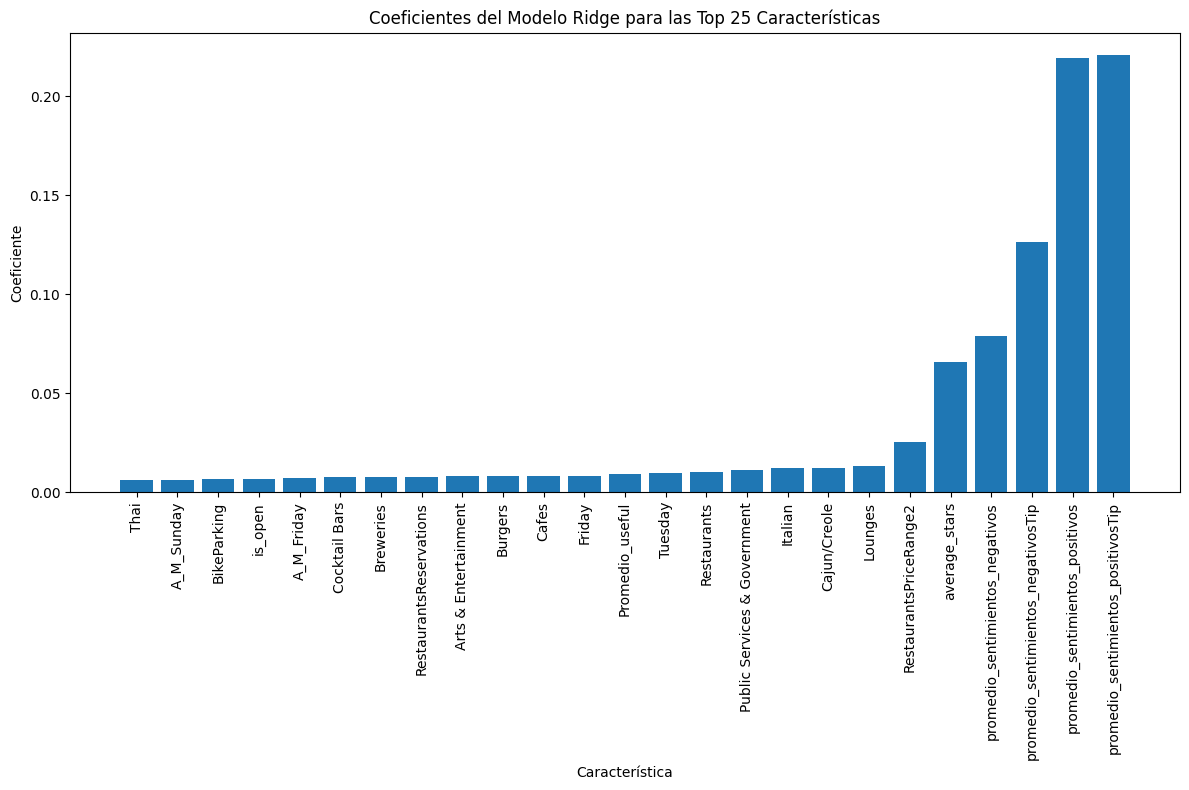

In [11]:
# Obtener los nombres de las características
feature_names = X.columns

# Obtener los coeficientes del modelo Ridge
coefs = ridge_model.coef_

# Obtener los nombres de las características
feature_names = X.columns

# Obtener los coeficientes y nombres de las top 25 características
top_25_coefs = coefs.argsort()[-25:]
top_25_feature_names = feature_names[top_25_coefs]

# Obtener los coeficientes correspondientes a las top 25 características
top_25_coefs = coefs[top_25_coefs]

# Visualizar los coeficientes de las top 25 características
plt.figure(figsize=(12, 8))
plt.bar(range(len(top_25_coefs)), top_25_coefs)
plt.xlabel('Característica')
plt.ylabel('Coeficiente')
plt.title('Coeficientes del Modelo Ridge para las Top 25 Características')
plt.xticks(range(len(top_25_coefs)), top_25_feature_names, rotation=90)
plt.tight_layout()
plt.show()



Este grafico muestra aquellas variables que mayor peso tienen en relacion con el volumen de estrellas que termina teniendo un negocio.

_______________________________________________________________________